In [5]:
# Librerías
import scipy.signal as signal
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from ztrans import *

## 1. Transformada Z

$ 9. y[n] = y[n − 1] + 0,5y[n − 1] + x[n − 2] − 10x[n − 3] $


$Y[Z] = Y(z)z^{-1} + 0.5Y(z)z^{-1} + z^{-2} - 10X(z)z^{-3}$

$\frac{Y(z)}{X(z)} = \frac{\frac{1}{z^2} \frac{10}{z^{-3}}}{1-\frac{1.5}{z}} = \frac{z-10}{z^3 - 1.5z^2 }$

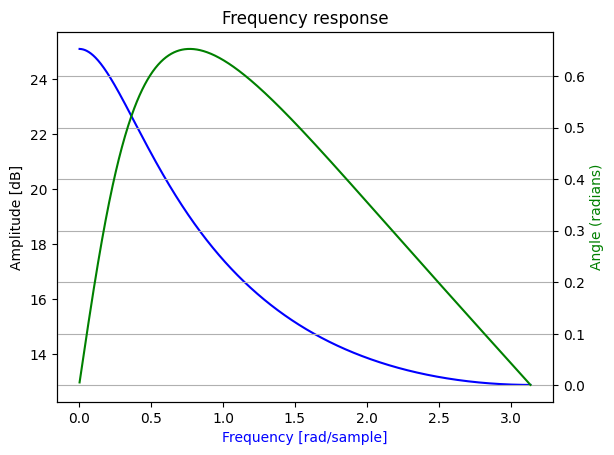

In [13]:
'''
1. Importe las funciones del archivo adjunto ztrans.py y úselas para graficar la respuesta en frecuencia y fase, la
respuesta al impulso, la respuesta al escalón, y el diagrama de polos y ceros.
'''

num = [1, -10] # Numerador
den = [1, -1.5, 0, 0] # Denominador

# Respuesta en frecuencia y fase
mfreqz(num,den)

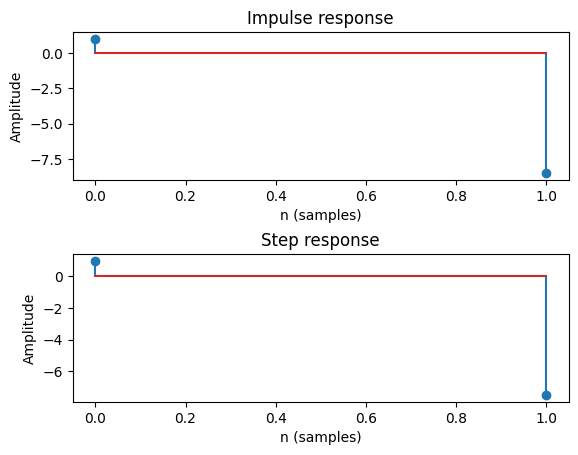

In [12]:
# Respuesta al impulso y al escalón
impz(num,den)

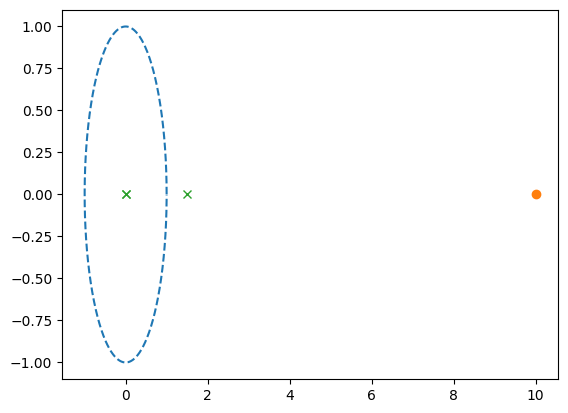

In [11]:
# Polos y zeros
zeropoles(num,den)

2. ¿Dónde están ubicados los polos y los ceros?

- Los ceros están en z = 10.
- Los polos están ubicados en z = 0 y z = 1.5, este último estará fuera del círculo unitario y causará inestabilidad al sistema.

3. ¿Qué se puede decir de la respuesta en frecuencia y fase de la función de transferencia?

- Se observa una linealidad y de retraso en la fase a mayores valores de frecuencia.

- Viendo la curva de la gráfica de la frecuencia se da cuenta que esta atenúa señales de entrada a partir de cierto valor y actúa como un filtro pasa-altos.


4. ¿Qué se puede decir acerca de la respuesta al impulso y al escalón?


- Para la respuesta al impulso y al escalón unitario se observa que esta para ambas crece con una amplitud menor a cero (negativa), esto podría indicar inestabilidad.

5. ¿Qué se puede decir acerca de la estabilidad del sistema?

- El sistema tiene una tendencia a ser inestable debido a su polo z = 1.5 que está fuera de la circunferencia unitaria y también su polo en z = 0 causaría que entradas pequeñas pueden hacer que la salida del sistema crezca sin límite o diverga.

## 2. Transformada Z: Introducción a los filtros digitales

In [23]:
'''
1. Genere una señal sinusoidal cuya frecuencia se incremente en el tiempo de forma cuadrática. La señal debe
tener una duración de 40 segundos y una frecuencia de muestreo de 5000 Hz.
'''

fs = 5000 # Frecuencia de muestreo
time = np.arange(0, 40, 1.0/fs) # Vector de tiempo
frec = time**2 # Frecuencia de la senal
sig = np.sin(2*np.pi*frec*time)

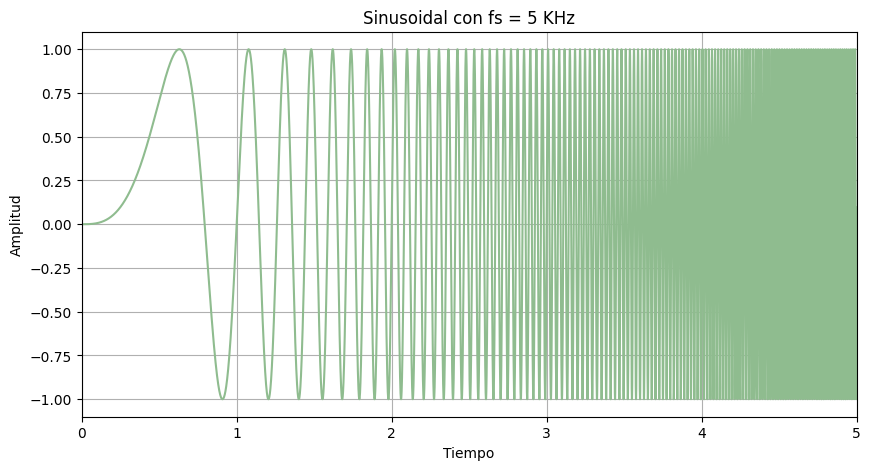

In [28]:
'''
2. Grafique y escuche la señal ¿Qué se puede decir acerca del audio?
'''

# Gráfica
plt.figure(figsize=(10,5))
plt.plot(time, sig, '#8FBC8F')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim(0 ,5)
plt.title('Sinusoidal con fs = 5 KHz')
plt.grid()
plt.show()

# Escuchar el audio
Audio(x, rate=fs)

Como la frecuencia aumenta con el tiempo, esta tendrá una tendencia a agudizarse a medida que aumente, por lo que lo hará muy rápido.

In [32]:
'''
3. Genere la función de transferencia de un filtro de respuesta finita al impulso (FIR) usando las siguientes
instrucciones.
'''

n = 9 # Orden del filtro

# El filtro tendrá una frecuencia de corte inferior en el 20% del rango de frecuencia de Nyquist y una
# frecuencia de corte superior en el 40% del rango de frecuencia de Nyquist.
num = signal.firwin(n, [0.2, 0.4], pass_zero=False)
den = np.zeros(n)
den[0] = 1

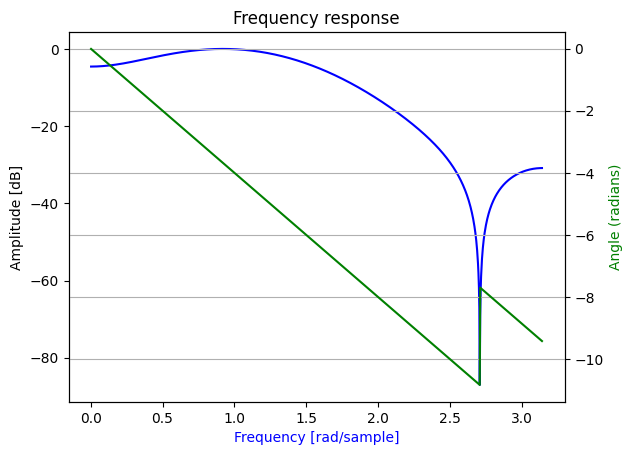

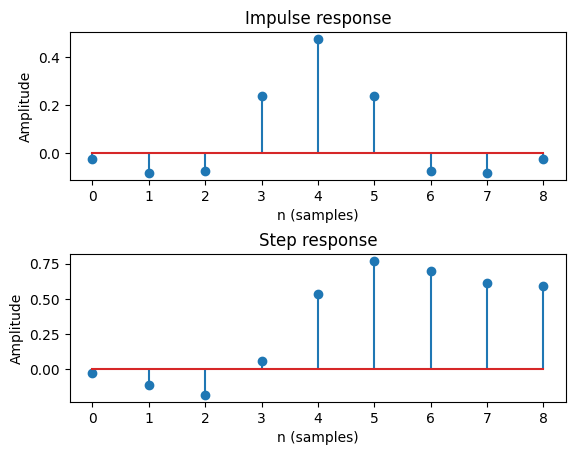

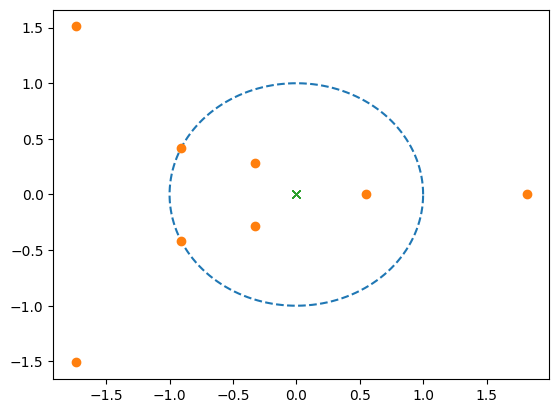

In [33]:
'''
4. Grafique la respuesta en frecuencia y fase, la respuesta al impulso, la respuesta al escalón, y el diagrama de
polos y ceros del filtro FIR.
'''
mfreqz(num,den)
impz(num,den)
zeropoles(num,den)

5. ¿Qué puede concluir acerca de las gráficas anteriores?

- Es un filtro pasa-bajas con fecuencia de corte en 0.2 y 0.4, ya que atenúa o directamente no dejará pasar las frecuencias altas y deja pasar las bajas.
Para la fase se tiene una linealidad que atrasa las señales cuando la frecuencia aumenta.

- Para la respuesta al escalón, se observa que tiene una envolvente sinusoidal, esto podría indicar pequeñas oscilasciones.
Para la respuesta al impulso, se evidencia que la amplitud de los pulsos tienen la forma de la función sinc(x), esta función tiende a atenuarse cuando el número de muestras es finito.

- El sistema tiene un polo en z = 0 y varios ceros, con complejos conjugados en 0.4 y 1.5, y con ceros reales en 0.4 y 2.4 aproximadamente.

- El sistema es estable porque tiene su polo dentro de la circunferencia unitaria.

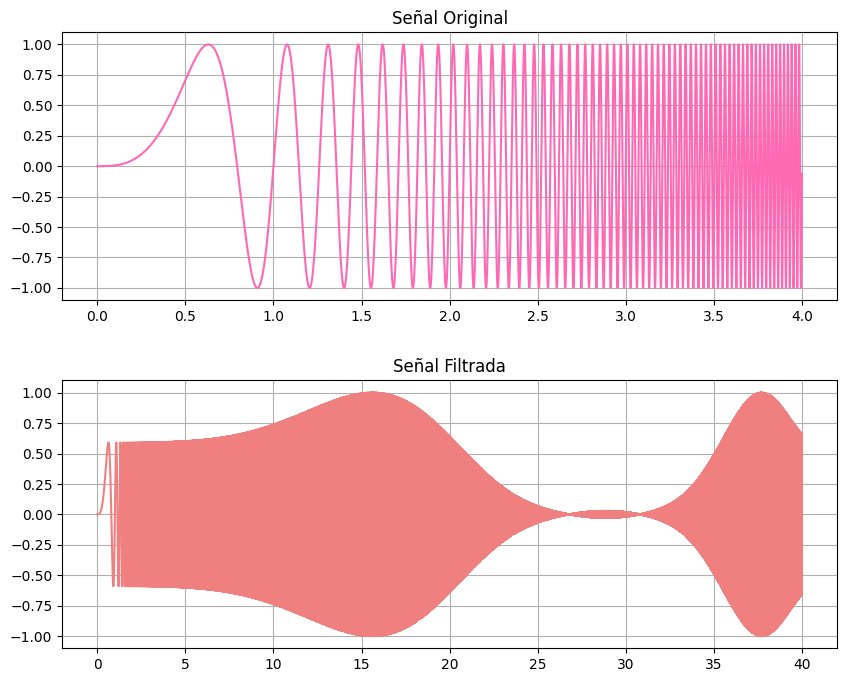

In [46]:
'''
6. Calcule la respuesta del filtro ante la señal generada previamente. Grafique la señal antes y después de pasar
por el filtro. ¿Qué le ocurrió a la señal?
'''

data2 = np.convolve(sig, num, mode='same')

# Gráficas
fig, axs = plt.subplots(2, figsize=(10,8))

axs[0].plot(time[0:20000], sig[0:20000], '#FF69B4')
axs[0].set_title('Señal Original')
axs[0].grid()

fig.subplots_adjust(hspace = 0.3)

axs[1].plot(time, data2, '#F08080')
axs[1].set_title('Señal Filtrada')
axs[1].grid()

La señal filtrada crece en tiempo hasta t = 16 aproximadamente, luego de esto se atenúa y en t = 32 aproximadamente vuelve a crecer, esto se debe a una respuesta en el filtro que implican varios lóbulos que actúan como pasa-bandas.

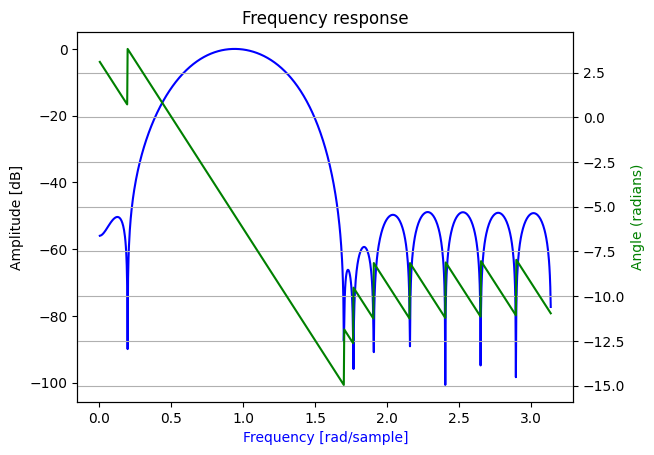

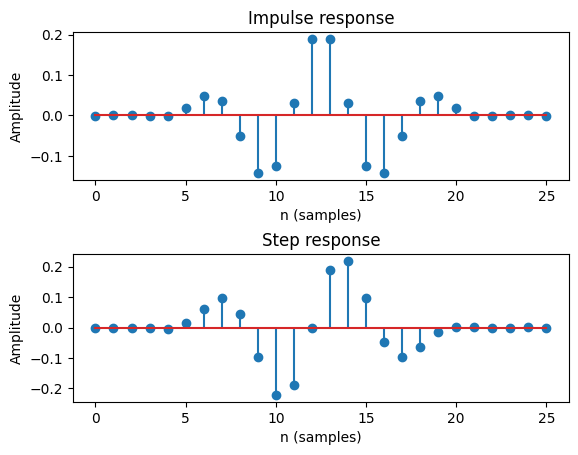

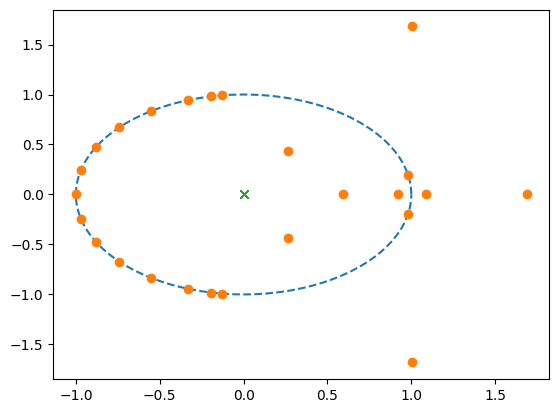

In [47]:
'''
7. Aumente progresivamente el orden n del filtro (mínimo 3 veces), repita el procedimiento anterior (items 3, 4,
5, y 6), y concluya. Qué puede decir de la respuesta en frecuencia, y de los polos y ceros.
'''

n = 20 # Orden del filtro
num = signal.firwin(n, [0.2, 0.4], pass_zero=False)
den = np.zeros(n)
den[0] = 1

mfreqz(num,den)
impz(num,den)
zeropoles(num,den)

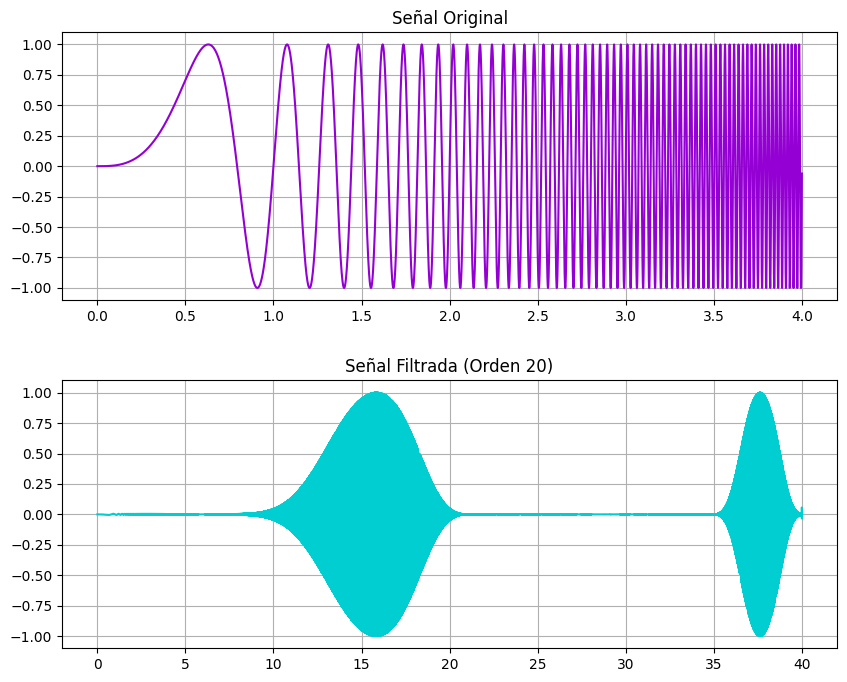

In [52]:
# Para el filtro FIR de orden 20
data2 = np.convolve(sig, num, mode='same')

# Gráficas
fig, axs = plt.subplots(2, figsize=(10,8))

axs[0].plot(time[0:20000], sig[0:20000], '#9400D3')
axs[0].set_title('Señal Original')
axs[0].grid()

fig.subplots_adjust(hspace = 0.3)

axs[1].plot(time, data2, '#00CED1')
axs[1].set_title('Señal Filtrada (Orden 20)')
axs[1].grid()

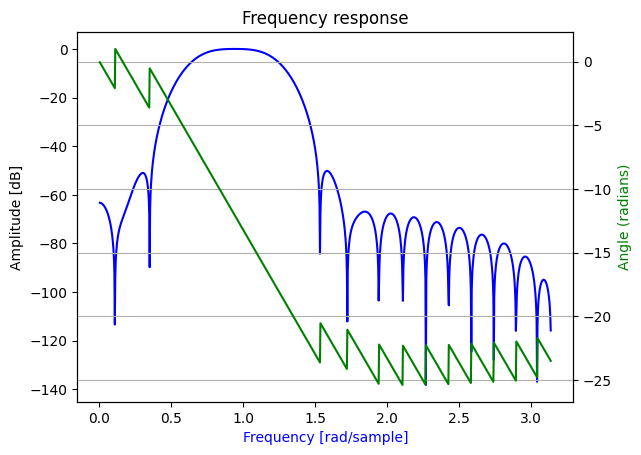

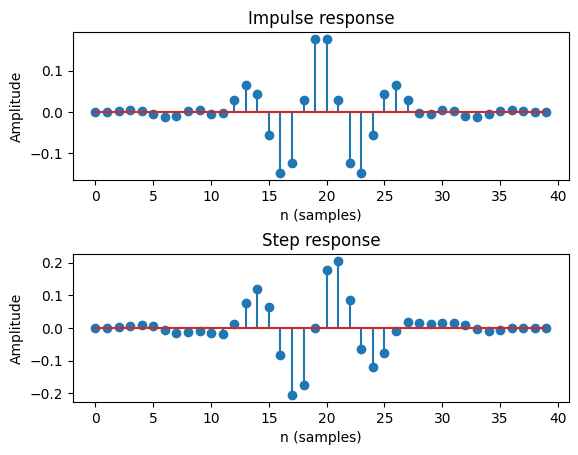

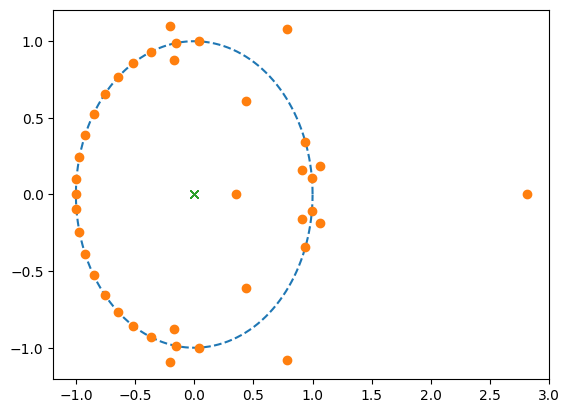

In [54]:
n = 40 # Orden del filtro
num = signal.firwin(n, [0.2, 0.4], pass_zero=False)
den = np.zeros(n)
den[0] = 1

mfreqz(num,den)
impz(num,den)
zeropoles(num,den)

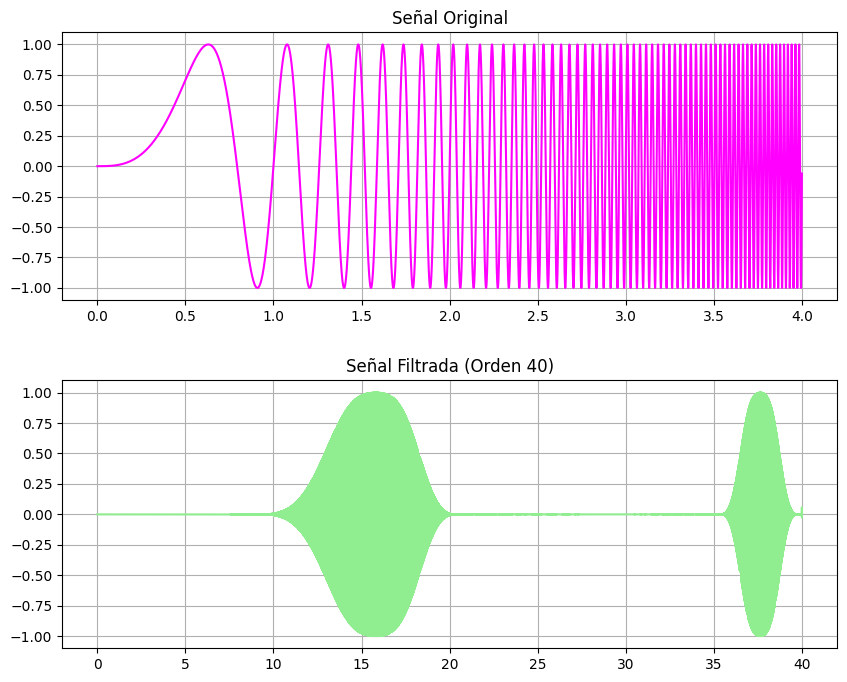

In [57]:
# Para el filtro FIR de orden 40

data2 = np.convolve(sig, num, mode='same')

# Gráficas
fig, axs = plt.subplots(2, figsize=(10,8))

axs[0].plot(time[0:20000], sig[0:20000], '#FF00FF')
axs[0].set_title('Señal Original')
axs[0].grid()

fig.subplots_adjust(hspace = 0.3)

axs[1].plot(time, data2, '#90EE90')
axs[1].set_title('Señal Filtrada (Orden 40)')
axs[1].grid()

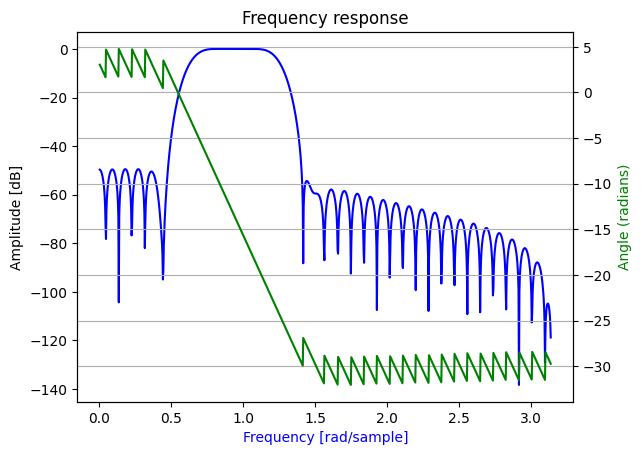

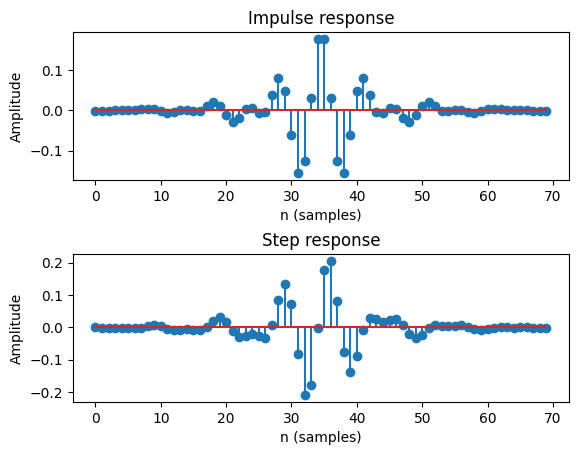

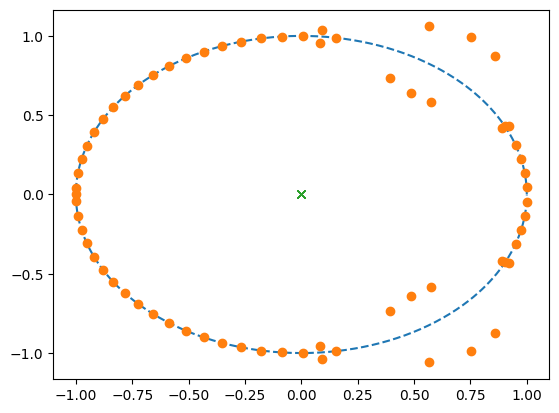

In [58]:
n = 70 # Orden del filtro
num = signal.firwin(n, [0.2, 0.4], pass_zero=False)
den = np.zeros(n)
den[0] = 1

mfreqz(num,den)
impz(num,den)
zeropoles(num,den)

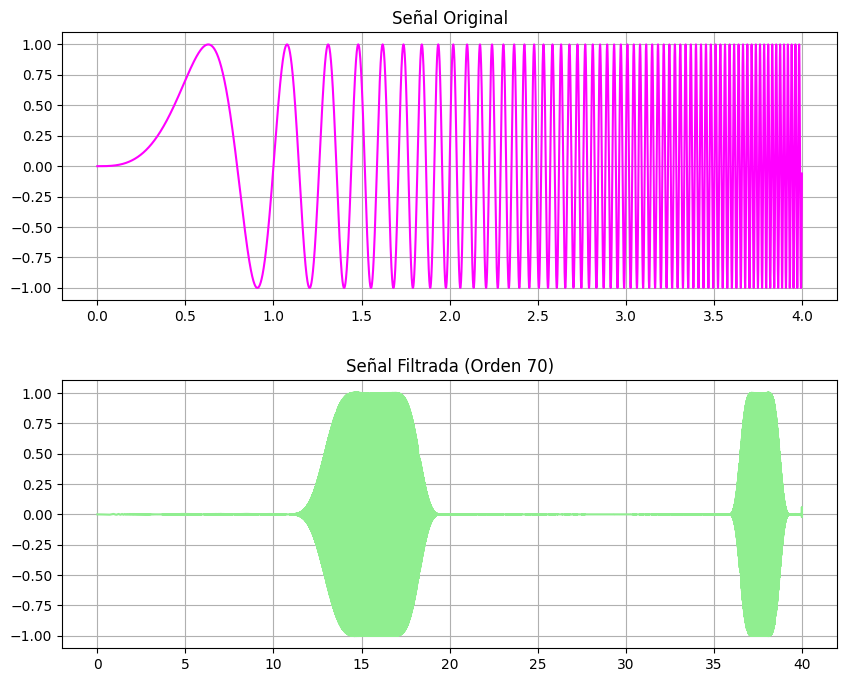

In [59]:
# Para el filtro FIR de orden 70

data2 = np.convolve(sig, num, mode='same')

# Gráficas
fig, axs = plt.subplots(2, figsize=(10,8))

axs[0].plot(time[0:20000], sig[0:20000], '#FF00FF')
axs[0].set_title('Señal Original')
axs[0].grid()

fig.subplots_adjust(hspace = 0.3)

axs[1].plot(time, data2, '#90EE90')
axs[1].set_title('Señal Filtrada (Orden 70)')
axs[1].grid()

A medida que aumenta el orden del filtro, se distinguen más dos lóbulos localizados aproximadamente en t = 16 y t = 37.5, ya que estos aumentan en amplitud y presentan una tendencia en su aspecto achatada. Esto en la gráfica de la respuesta da señales con mayor definición y atenuación en diferentes secciones.

Para los polos y los ceros se tiene que, a mayor número del filtro, mayor número de ceros que realmente no afectan la estabilidad del sistema, esto es porque los polos siguen situados dentro de la circunferencia unitaria.

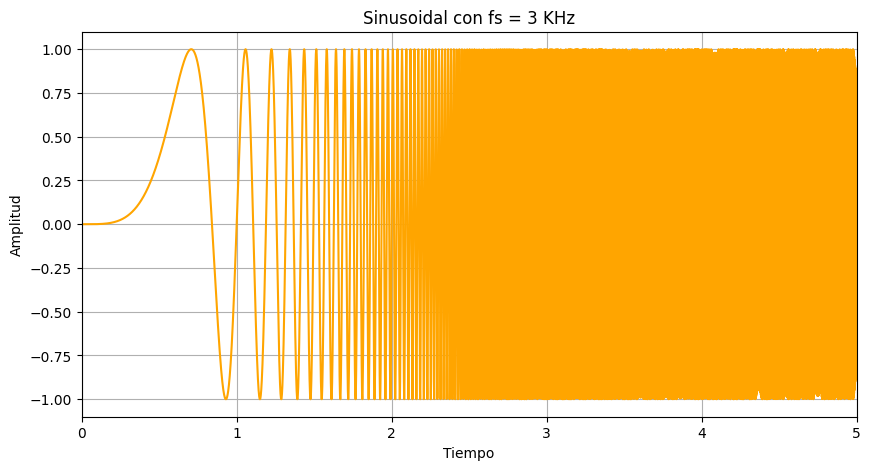

In [65]:
'''
8. Genere una señal sinusoidal cuya frecuencia se incremente en el tiempo de forma cúbica, la señal debe tener
la misma duración (40 seg) y una frecuencia de muestreo de 3000 Hz. Repita los pasos 3, 4, 5 y 6. Concluya
de acuerdo a las gráficas obtenidas.
'''

fs = 3000 # Frecuencia de muestreo
time = np.arange(0,40+1/fs,1/fs)
sig8 = np.sin(2*np.pi*time*time**3)


# Gráfica
plt.figure(figsize=(10,5))
plt.plot(time[0:100000], sig8[0:100000], '#FFA500')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim(0 ,5)
plt.title('Sinusoidal con fs = 3 KHz')
plt.grid()
plt.show()

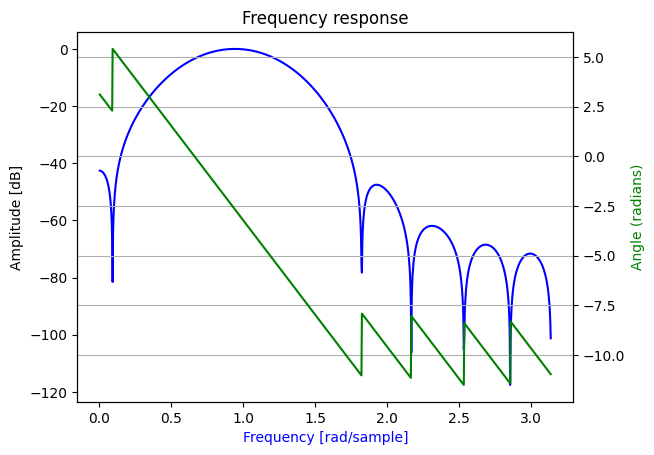

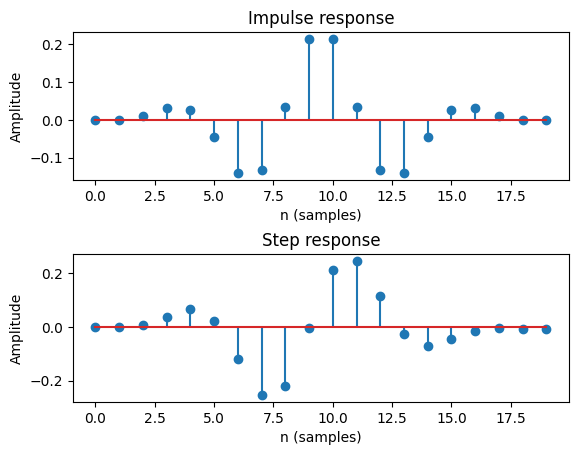

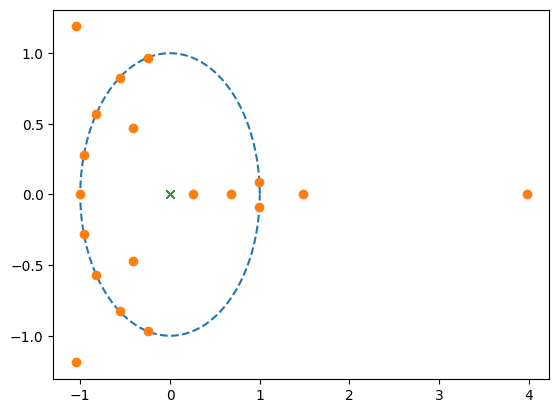

In [66]:
n = 20 # Orden del filtro
num = signal.firwin(n, [0.2, 0.4], pass_zero=False)
den = np.zeros(n)
den[0] = 1

mfreqz(num,den)
impz(num,den)
zeropoles(num,den)

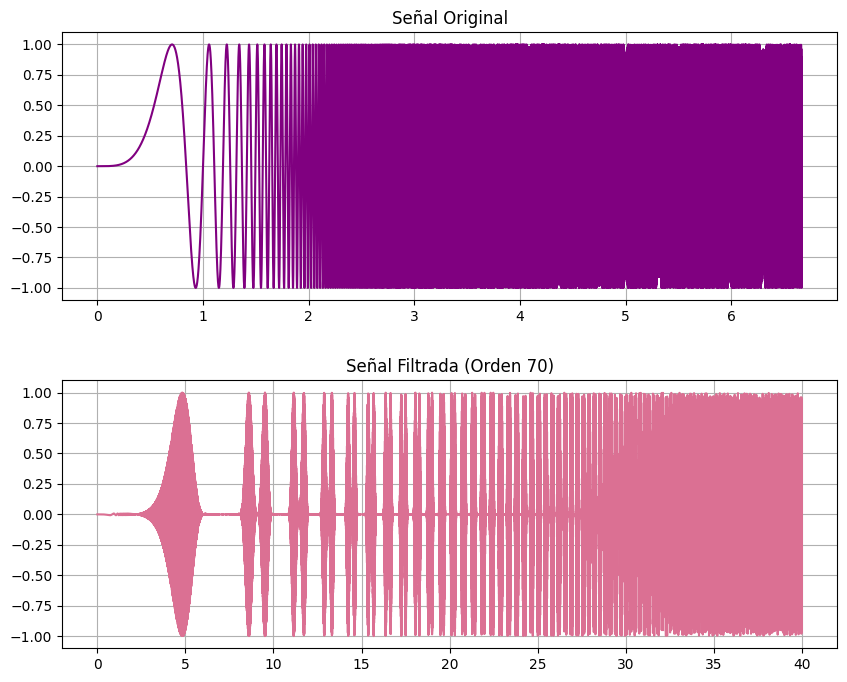

In [70]:
# Para el filtro FIR de orden 20

data2 = np.convolve(sig8, num, mode='same')

# Gráficas
fig, axs = plt.subplots(2, figsize=(10,8))

axs[0].plot(time[0:20000], sig8[0:20000], '#800080')
axs[0].set_title('Señal Original')
axs[0].grid()

fig.subplots_adjust(hspace = 0.3)

axs[1].plot(time, data2, '#DB7093')
axs[1].set_title('Señal Filtrada (Orden 70)')
axs[1].grid()

La señal logra una saturación en el tiempo mucho mayor, esto debido a la esencia cúbica de su frecuencia. Esto permite tener mucho más lóbulos tras filtrarse que se atenúan muy rápido.

## 3. Agregando Polos y Ceros al sistema

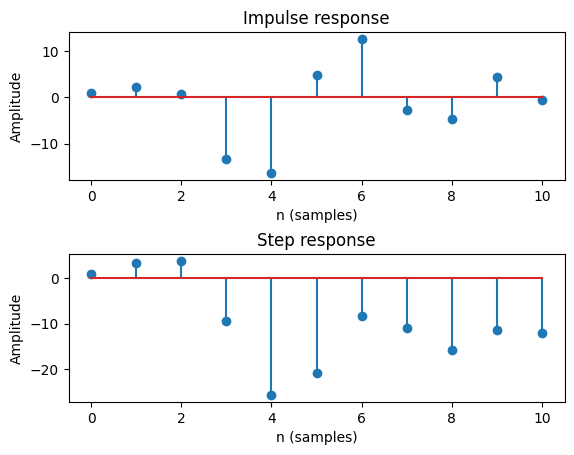

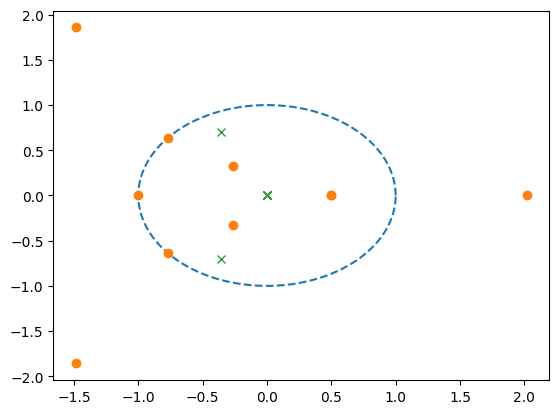

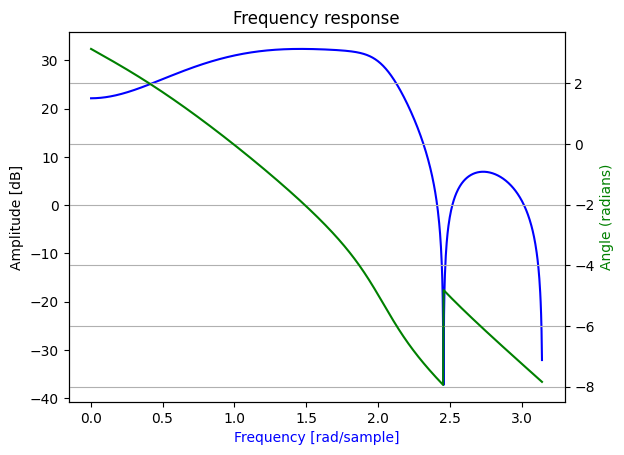

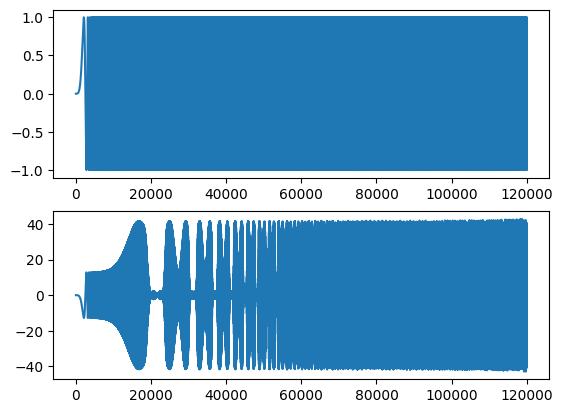

In [81]:
'''
1. Retorne al sistema anterior con n = 10.
'''

n = 10 # Orden del filtro
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1


'''
2. Use la función computeZ(num, den, zeros, poles, data) que se encuentra en el archivo adjunto (ztrans.py) para
agregar polos y ceros a una función de transferencia.
'''
# Agregue polos conjugados en los puntos z1=-sqrt(2)/4+sqrt(2)/2j y z2=-sqrt(2)/4-sqrt(2)/2j y un cero en z=0.5
computeZ(num, den, [0.5], [complex(-np.sqrt(2)/4,np.sqrt(2)/2), complex(-np.sqrt(2)/4,-np.sqrt(2)/2)], sig8)

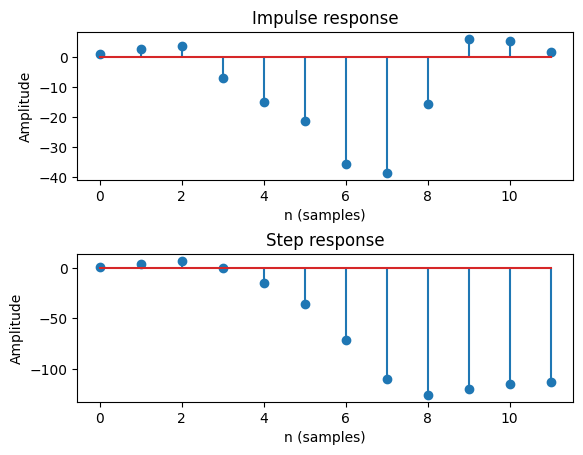

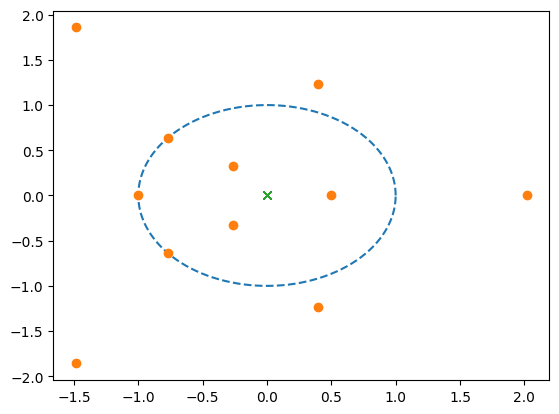

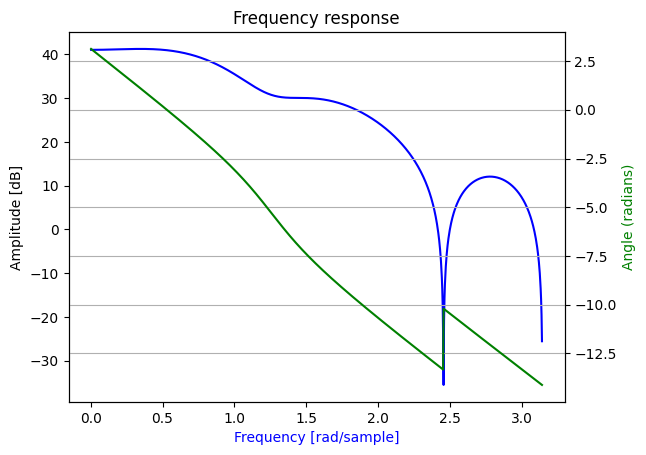

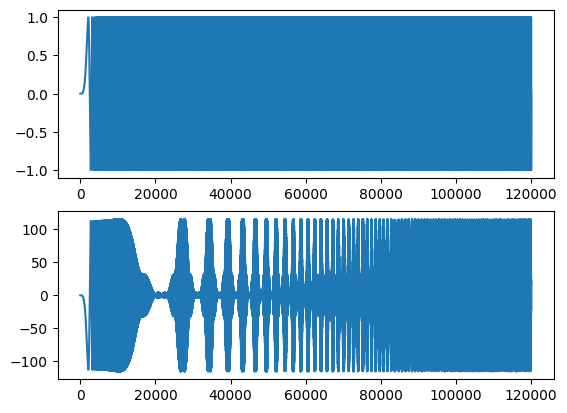

In [82]:
'''
3. Explique el comportamiento del sistema si se agrega de forma independiente:

- Dos ceros conjugados de magnitud 1.3
'''

z1 = complex(0.4,1.236)
z2 = complex(0.4,-1.236)

computeZ(num, den, [z1, z2],[], sig8)

Los ceros no interfieren en la estabilidad del sistema, estos solo modifican la respuesta en frecuencia del mismo.

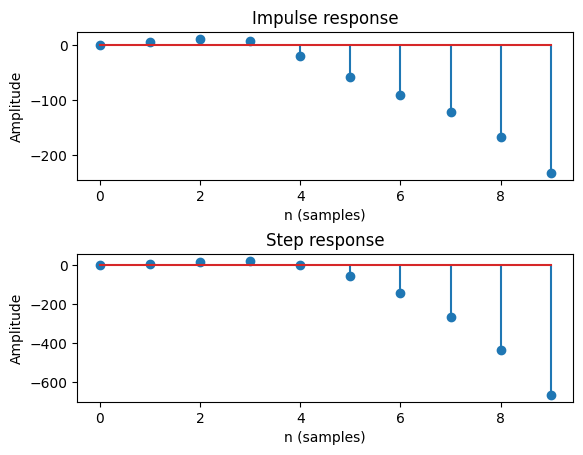

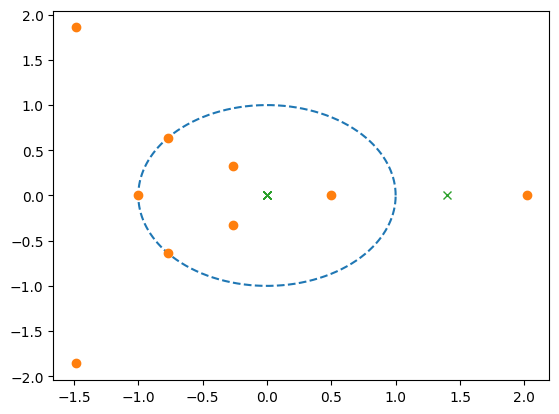

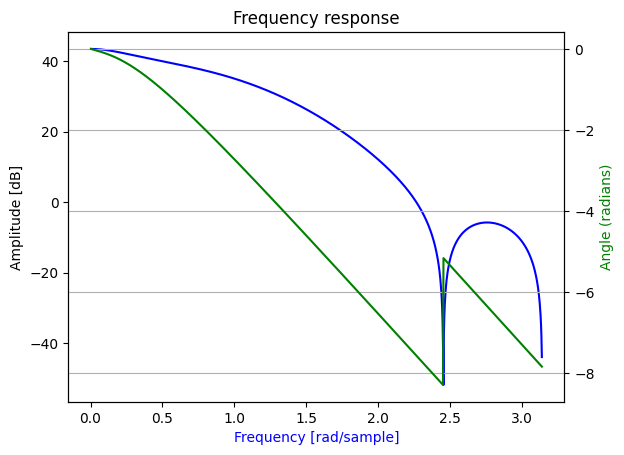

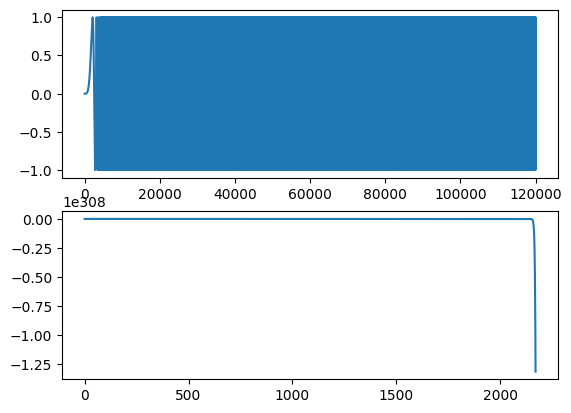

In [85]:
'''
3. Explique el comportamiento del sistema si se agrega de forma independiente:

- Un polo real de magnitud 1.4
'''

z3 = complex(1.399,0)
computeZ(num, den, [],[z3], sig8)

Cuando añadí 1.4 como argumento, el programa no se ejecutó completamente debido a un error, por lo que se aproximó su valor a uno inmediatamente menor y corrió sin problemas.
Este valor genera inestabilidad, ya que es un polo mayor a 1 y por ende, se sale de la circunferencia unitaria.

## Conclusiones

- Para un filtro FIR, a medida que su orden aumenta también lo hacen los ceros de la misma, por lo que se modifica su función de transferencia y su respuesta en frecuencia.

- La estabilidad de un sistema solo depende del valor de sus polos, con polos dentro de la circunferencia unitaria se asegura la estabilidad del sistema, de lo contrario no.

- Las señales sinusoidales se comportan como un filtro pasa-bajas en los diagramas de Bode, pero al convolucionarlas con un filtro generado, pueden actuar como un filtro de rechazo de banda. Sin embargo, cuando la frecuencia de la señal se acerca a la frecuencia de muestreo, aparece el efecto de aliasing, lo que puede distorsionar la señal original.